In [11]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [2]:
# Import dataset

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Check type of variables

df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [4]:
# Change variable type of 'gender'

genders = {"Female" : 1, "Male" : 0}
df['gender_binary'] = df['gender'].map(genders)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_binary
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0


In [5]:
# Change variable type of 'smoking_history'

df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
smoking_cat = {'No Info' : 0, 'never' : 1, 'former' : 2, 'current' : 3, 'ever' : 4, 'not current' : 5}
df['smoking_history_binary'] = df['smoking_history'].map(smoking_cat)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_binary,smoking_history_binary
0,Female,80.0,0,1,never,25.19,6.6,140,0,1.0,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1.0,3
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.0,3


In [7]:
# Check type of variables after the changes

df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64
gender_binary,float64


In [9]:
# Check for missing value and remove them

print(df.isna().sum())
df = df.dropna()

gender                    0
age                       0
hypertension              0
heart_disease             0
smoking_history           0
bmi                       0
HbA1c_level               0
blood_glucose_level       0
diabetes                  0
gender_binary             0
smoking_history_binary    0
dtype: int64


In [10]:
df.shape

(99982, 11)

## Descriptive analysis

In [ ]:
# Check the shape of the clean dataset (number of rows, colums)

df.shape

(99982, 11)

In [ ]:
# Check the name of the columns

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'gender_binary', 'smoking_history_binary'],
      dtype='object')

In [ ]:
# Statistics summary of continuous variables

df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,27.320757,5.527529,138.057810
std,22.517206,6.636853,1.070665,40.709469
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

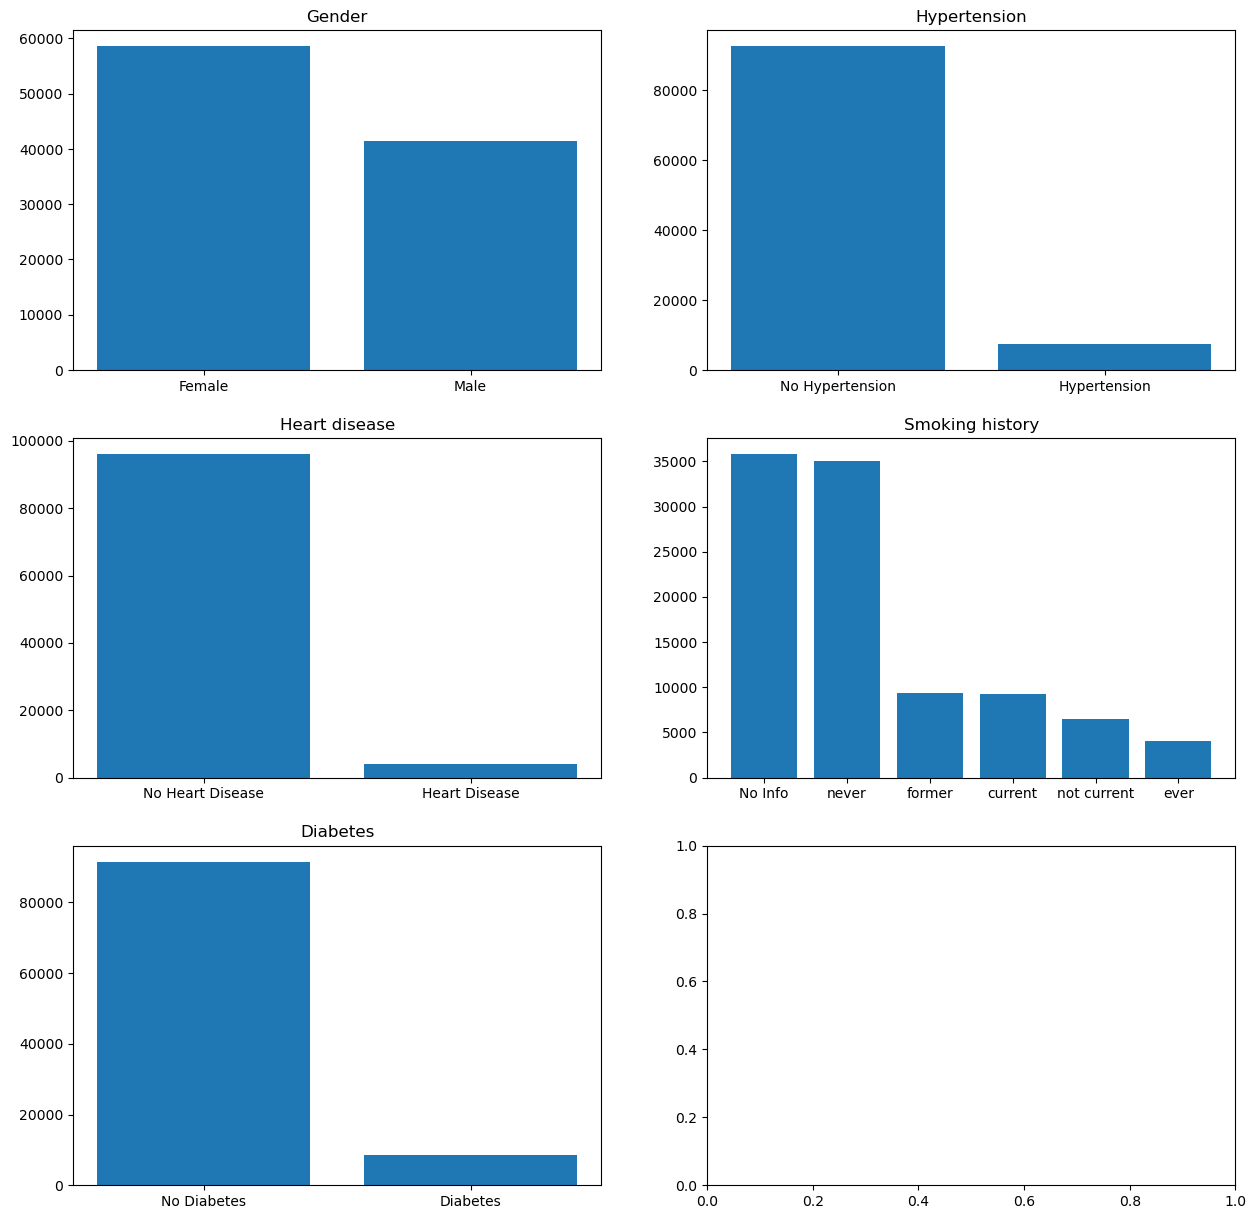

In [ ]:
# Frequency of catogorical variables (barplots)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
axs[0, 0].set_title('Gender')
axs[0, 0].set_xticks(df['gender'].value_counts().index)


axs[0, 1].bar(df['hypertension'].value_counts().index, df['hypertension'].value_counts().values)
axs[0, 1].set_title('Hypertension')
axs[0, 1].set_xticks(df['hypertension'].value_counts().index)
axs[0, 1].set_xticklabels(['No Hypertension', 'Hypertension'])

axs[1, 0].bar(df['heart_disease'].value_counts().index, df['heart_disease'].value_counts().values)
axs[1, 0].set_title('Heart disease')
axs[1, 0].set_xticks(df['heart_disease'].value_counts().index)
axs[1, 0].set_xticklabels(['No Heart Disease', 'Heart Disease'])

axs[1, 1].bar(df['smoking_history'].value_counts().index, df['smoking_history'].value_counts().values)
axs[1, 1].set_title('Smoking history')
axs[1, 1].set_xticks(df['smoking_history'].value_counts().index)

axs[2, 0].bar(df['diabetes'].value_counts().index, df['diabetes'].value_counts().values)
axs[2, 0].set_title('Diabetes')
axs[2, 0].set_xticks(df['diabetes'].value_counts().index)
axs[2, 0].set_xticklabels(['No Diabetes', 'Diabetes'])

Text(0.5, 1.0, 'Blood glucose level')

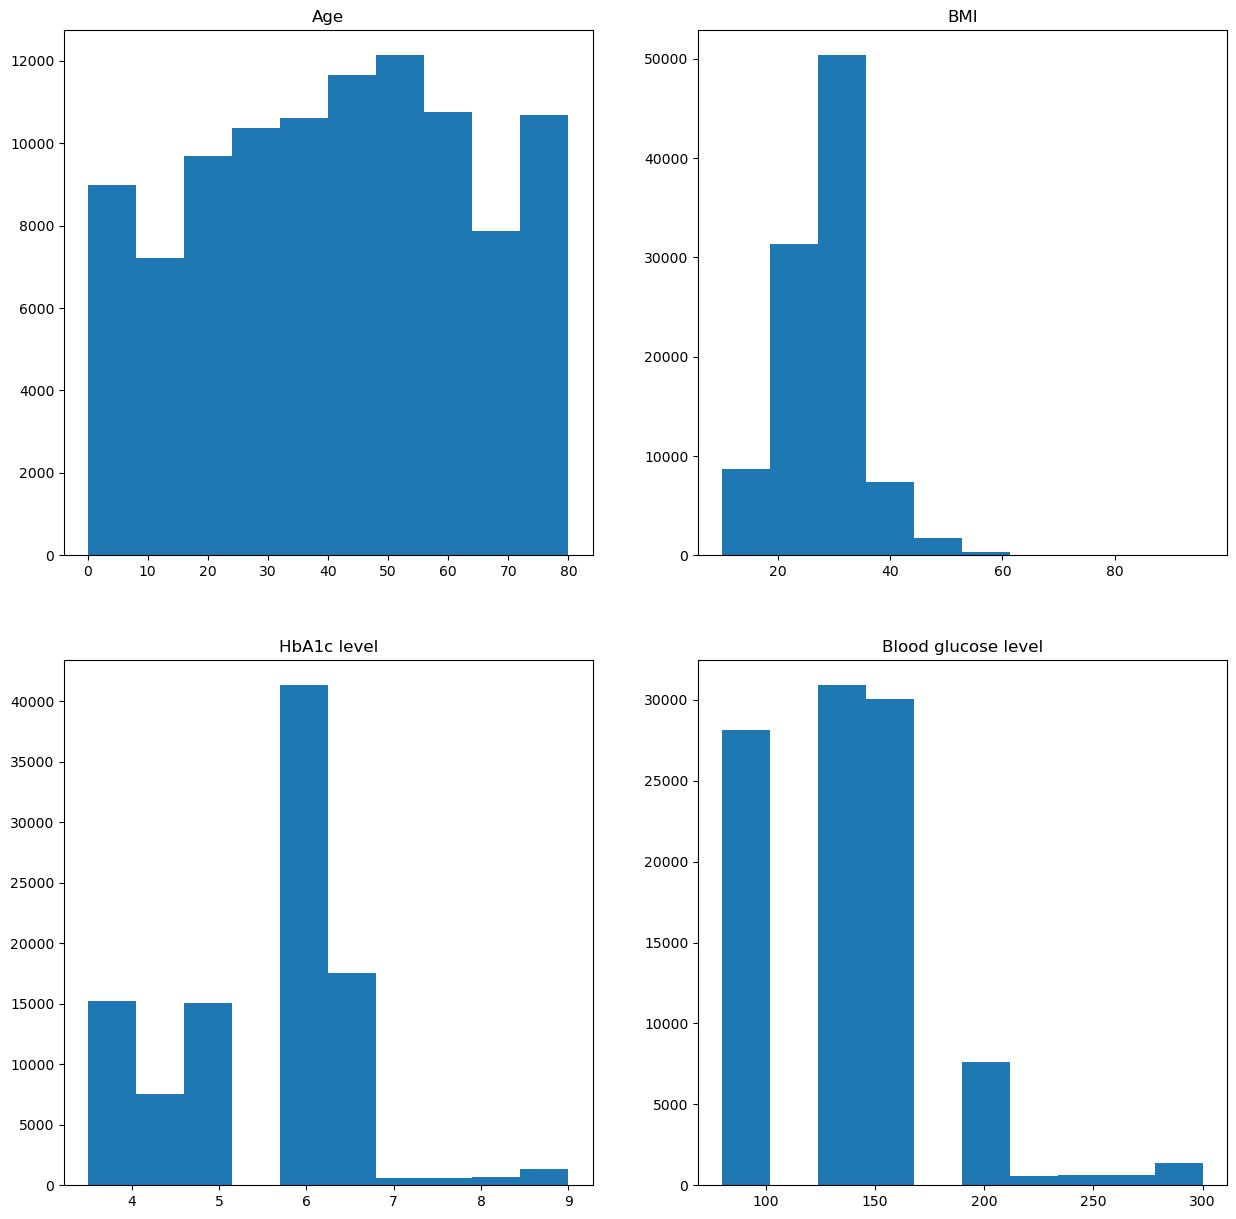

In [ ]:
# Histogram of continuous variables (distributions)

fig, axs = plt.subplots(2,2, figsize=(15, 15))

axs[0,0].hist(df['age'])
axs[0,0].set_title('Age')

axs[0,1].hist(df['bmi'])
axs[0,1].set_title('BMI')

axs[1,0].hist(df['HbA1c_level'])
axs[1,0].set_title('HbA1c level')

axs[1,1].hist(df['blood_glucose_level'])
axs[1,1].set_title('Blood glucose level')

In [ ]:
# Correlation matrix of continuous variables

corr = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()

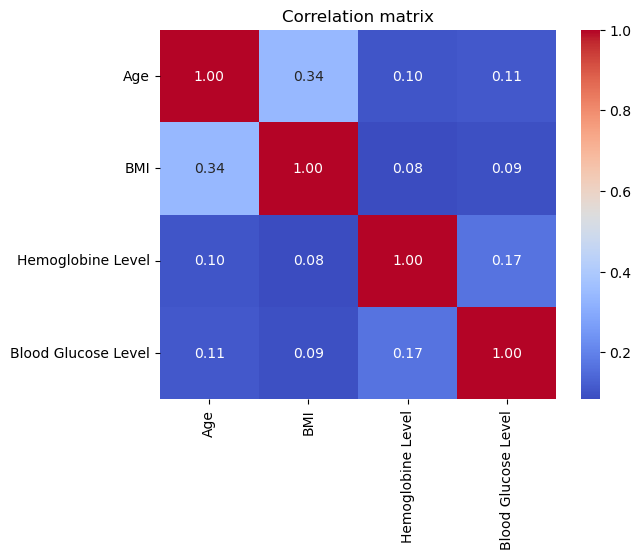

In [ ]:
# Heat map based on correlation matrix

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True,   xticklabels=['Age', 'BMI', 'Hemoglobine Level', 'Blood Glucose Level'],
    yticklabels=['Age', 'BMI', 'Hemoglobine Level', 'Blood Glucose Level'])
plt.title('Correlation matrix')
plt.show()

## Neural network

In [ ]:
# Definition pf dependent and independent variables
X = df[['gender_binary', 'age', 'hypertension', 'heart_disease', 'smoking_history_binary', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# Split into train and test sets and scalation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Definition of the neural network network
model = Sequential([
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation="sigmoid")
])

# Compilation of the model
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])


# Training of the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - accuracy: 0.8380 - loss: 0.1107 - val_accuracy: 0.8404 - val_loss: 0.1055
Epoch 2/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 606us/step - accuracy: 0.8798 - loss: 0.0837 - val_accuracy: 0.9537 - val_loss: 0.0457
Epoch 3/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step - accuracy: 0.8812 - loss: 0.0826 - val_accuracy: 0.8341 - val_loss: 0.1106
Epoch 4/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step - accuracy: 0.8833 - loss: 0.0808 - val_accuracy: 0.9132 - val_loss: 0.0698
Epoch 5/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 587us/step - accuracy: 0.8807 - loss: 0.0814 - val_accuracy: 0.8388 - val_loss: 0.1100
Epoch 6/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 585us/step - accuracy: 0.8793 - loss: 0.0831 - val_accuracy: 0.8414 - val_loss: 0.1055
Epoch 7/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step - accuracy: 0.8834 - loss: 0.0802 - val_accuracy: 0.9151 - val_loss: 0.0718
Epoch 8/10
3663/3663 ━━━━━━━━━━━━━━━━━━━━ 2s 596us/step - accuracy: 0.8806 -

In [ ]:
# Model evaluation on test datasets

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9512 - loss: 0.0387
Test Accuracy: 0.9498924612998962


In [ ]:
# Make predictions on the test data to evaluate

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18222
           1       0.71      0.73      0.72      1775

    accuracy                           0.95     19997
   macro avg       0.84      0.85      0.85     19997
weighted avg       0.95      0.95      0.95     19997



In [ ]:
# Save the model in the native Keras format

model.save('diabetes_predictor.keras')